## Configuración inicial 

- En este notebook vamos a descargar el dataset book que contiene muchos libros en inglés en formato tokenizado, de los cuales vamos a hacer procesamineto.

In [1]:
import nltk
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\MICHU\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\MICHU\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     C:\Users\MICHU\AppData\Roaming\nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\MICHU\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     C:\Users\MICHU\AppData\Roaming\nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     C:\Users\MICHU\AppData\R

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## Analizando texto

In [2]:
# Cual es nuestro texto 1
text1

<Text: Moby Dick by Herman Melville 1851>

In [3]:
# Cuales son los primeros tokens de nuestro texto
text1.tokens[:10]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

In [4]:
# Tamaño del texto tokenizado
print(len(text1))

260819


## Medida de riqueza lexica en un texto: 
$$ R_l = \frac{\text{total de palabras únicas}}{\text{total de palabras}} = \frac{\text{longitud del vocabulario}}{\text{longitud del texto}}$$ 

In [5]:
# Primero realizamos la construcción de un vocabulario (identificamos las palabras unicas que hay en el libro)
# https://docs.python.org/2/library/sets.html
vocabulario = sorted(set(text1)) # Sorted para convertir de diccionario a array
print(vocabulario[1000:1050])

['Crew', 'Crish', 'Crockett', 'Cross', 'Crossed', 'Crossing', 'Crotch', 'Crowding', 'Crown', 'Crozetts', 'Cruelty', 'Cruising', 'Cruppered', 'Crusaders', 'Crushed', 'Crying', 'Cuba', 'Curious', 'Curse', 'Cursed', 'Curses', 'Cussed', 'Customs', 'Cut', 'Cutter', 'Cutting', 'Cuvier', 'Cyclades', 'Czar', 'D', 'DAGGOO', 'DAM', 'DANCE', 'DANCING', 'DANIEL', 'DANISH', 'DARKENS', 'DARWIN', 'DAVENANT', 'DEAD', 'DEATH', 'DEBELL', 'DECK', 'DEL', 'DESTROYED', 'DEVIL', 'DICTIONARY', 'DID', 'DIGNITY', 'DISCOVERS']


In [6]:
# Obtener la riqueza lexica 
def riqueza_lexica(texto):
    vocabulario = sorted(set(text1))
    return len(vocabulario) / len(texto)

riqueza_lexica(text1)

0.07406285585022564

In [7]:
# Porcentaje de aparicion de palabras dentro de un texto
def porcentaje_palabra(palabra, texto):
    return 100 * texto.count(palabra) / len(texto)

porcentaje_palabra('monster', text1)

0.018786974875296663

## Estadistica del Lenguaje

Los cálculos estadísticos más simples que se pueden efectuar sobre un texto o un corpus son los relacionados con frecuencia de aparición de palabras.

* Podemos construir un diccionario en Python donde las llaves sean las palabras y los valores sean las frecuencias de ocurrencias de esas palabras.

* ejemplo `dic = {'monster': 49 ,  'boat': 54,  ...}`

In [8]:
# Distribucion de palabras de un texto
diccionario = {}
for palabra in set(text1):
    diccionario[palabra] = text1.count(palabra)
diccionario

{'shark': 27,
 'read': 26,
 'pierced': 4,
 'menace': 1,
 'hain': 1,
 'Pudding': 2,
 'boil': 2,
 'locksmith': 1,
 'outlandishness': 1,
 'investment': 1,
 'starboard': 16,
 'accomplished': 7,
 'Awful': 1,
 'Port': 1,
 'undiscovered': 2,
 'ineffectually': 1,
 'shoe': 7,
 'tolling': 1,
 'DEAD': 1,
 'incites': 1,
 'fleshy': 2,
 'heroes': 5,
 'twelvemonth': 3,
 'adjacent': 2,
 'sorts': 18,
 'neglected': 2,
 'observant': 1,
 'tunnel': 1,
 'frightens': 2,
 'Milky': 1,
 'cartridge': 1,
 'supposes': 1,
 'counterpart': 3,
 'Boone': 1,
 'leopard': 1,
 'Skeleton': 1,
 'Bulkington': 8,
 'inquired': 1,
 'wallow': 3,
 'relieve': 3,
 'proceedings': 5,
 'ungainly': 1,
 'seemingly': 9,
 'observe': 11,
 'rail': 9,
 'Sounding': 1,
 'tindering': 1,
 'furnish': 9,
 'jumping': 2,
 'uttering': 2,
 '59': 1,
 'loom': 7,
 'overlapping': 2,
 'clergy': 2,
 'warming': 2,
 'Ishmael': 19,
 'tall': 22,
 'sluggish': 2,
 'prescient': 1,
 'gouged': 1,
 'objectionable': 1,
 'soft': 31,
 'apparently': 9,
 'sits': 5,
 'snort

## Metodo FreqDist de NLKT

In [9]:
# Anadiendo el medoto FreqDist a nuestro text1
fdist = FreqDist(text1)

In [10]:
# Vocabulario mas comun
fdist.most_common(20)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

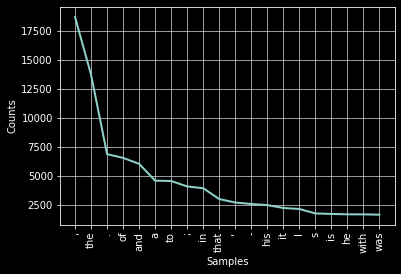

In [11]:
# Vocabulario mas comun en forma de grafico
plt.style.use('dark_background')
fdist.plot(20)

In [12]:
# Cuantas veces se encuentra la palabra en nuestro texto
fdist['monster']

49

## Distribuciones sobre contenido con filtro-fino

* Como vimos en la sección anterior, los tokens más frecuentes en un texto no son necesariamente las palabras que mas informacion nos arrojan sobre el contenido del mismo. 
* Por ello, es mejor filtrar y construir distribuciones de frecuencia que no consideren signos de puntuación o caracteres especiales

In [13]:
# Obtener palabras con mas de 5 letras y crear un nuevo vocabularion con estas
long_words = [word for word in text1 if len(word) > 5]
vocabulario_filtrado = sorted(set(long_words))
vocabulario_filtrado

['ACCOUNT',
 'ADDITIONAL',
 'ADVANCING',
 'ADVENTURES',
 'AFFGHANISTAN',
 'AFRICA',
 'AGAINST',
 'ALFRED',
 'ALGERINE',
 'AMERICA',
 'ANCHORS',
 'ANIMAL',
 'ANNALS',
 'ANOTHER',
 'APOLOGY',
 'APPLICATION',
 'APPROACHING',
 'ARCTIC',
 'AROUND',
 'ASCENDING',
 'ASPECT',
 'ATTACK',
 'ATTACKED',
 'ATTITUDES',
 'AUGUST',
 'AUTHOR',
 'Abashed',
 'Abednego',
 'Abjectus',
 'Aboard',
 'Abominable',
 'Abraham',
 'Academy',
 'Accessory',
 'According',
 'Accordingly',
 'Accursed',
 'Achilles',
 'Actium',
 'Acushnet',
 'Admiral',
 'Admirals',
 'Advance',
 'Advancement',
 'Adventures',
 'Adverse',
 'Advocate',
 'Affected',
 'Affidavit',
 'Affrighted',
 'Africa',
 'African',
 'Africans',
 'Afterwards',
 'Against',
 'Agassiz',
 'Ahasuerus',
 'Alabama',
 'Aladdin',
 'Alarmed',
 'Albatross',
 'Albemarle',
 'Albert',
 'Albicore',
 'Albino',
 'Aldrovandi',
 'Aldrovandus',
 'Alexander',
 'Alexanders',
 'Alfred',
 'Algerine',
 'Algiers',
 'Alleghanian',
 'Alleghanies',
 'Almanack',
 'Almighty',
 'Almost',
 

Podemos ahora construir una lista de tuplas, basados en los conteos ya pre-calculados de la función `FreqDist`, así:

`fdist_filtrado = [('account', 2), ('additional', 32), ('advancing', 5), ...]`

Luego podemos convertir el objeto creado a formato de `np.array`de **Numpy** para poder hacer un sort por palabras mas frecuentes.

`fdist_filtrado = np.array(fdist_filtrado, *args)`

`np.sort(fdist_filtrado, *args) = [('account', 2), ('advancing', 5), ('additional', 32), ...]`

In [14]:
palabras_interesantes = [(palabra, fdist[palabra]) for palabra in set(text1) 
                         if len(palabra)>5 and fdist[palabra] >10]
# Convertir a objeto de libreria numpy
dtypes = [('word', 'S10'), ('frequency', int)]
palabras_interesantes = np.array(palabras_interesantes, dtype=dtypes)
palabras_ordenadas = np.sort(palabras_interesantes, order = 'frequency')
palabras_ordenadas[-20:] # Top de palabras mas frecuentes

array([(b'between', 117), (b'something', 119), (b'against', 132),
       (b'things', 132), (b'thought', 149), (b'CHAPTER', 150),
       (b'without', 154), (b'Pequod', 172), (b'should', 181),
       (b'almost', 186), (b'Starbuck', 196), (b'himself', 203),
       (b'Captain', 215), (b'through', 227), (b'whales', 237),
       (b'little', 247), (b'Queequeg', 252), (b'seemed', 283),
       (b'before', 293), (b'though', 335)],
      dtype=[('word', 'S10'), ('frequency', '<i4')])

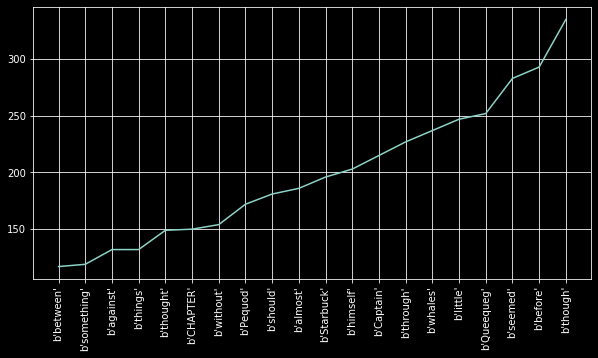

In [15]:
# Graficar las palabras mas repetidas 
top_words = 20
x = np.arange(len(palabras_ordenadas[-top_words:]))
y = [freq[1] for freq in palabras_ordenadas[-top_words:]]
plt.style.use('dark_background')
plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.xticks(x, [str(freq[0]) for freq in palabras_ordenadas[-top_words:]], rotation='vertical')
plt.grid(True)
plt.show()